Q1.  Write python code that would do the following:
- Create a data frame from the input (File: Delhi-Electricity-SubStation.csv).
- In Telephone Numbers there are multiple numbers.  Create separate columns for these Telephone1, Telephone2 etc.
- Determine the accuracy of the Coordinates with Address.  Add another column GeoAccuracy.  Find the coordinates using the address.  If the coordinates match exactly with address, then accuracy is 100%, otherwise for every 10 meters off consider a drop in accuracy of 1 %.  For example, if the coordinate of the address is 30 meters away from the given coordinates, the accuracy would be 70%.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
df1 = pd.read_csv(r"C:\Users\Yashas\OneDrive\Desktop\new1\Delhi-Electricity-SubStations.csv")

In [105]:
df2 = pd.read_csv(r"C:\Users\Yashas\OneDrive\Desktop\new1\MH-Vehicle-Reg.csv")

In [79]:
df1.head()

,_id,Substations,Telephone Numbers,Address,Voltage Class,Coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015"


In [80]:
df2.head()

,_id,Sr No.,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


In [81]:
df1.shape

(43, 6)

In [82]:
df2.shape

(900, 27)

In [83]:
df1["Telephone Numbers"][:5]

0     27791190/1193/1210
1      25314199/25314204
2           0120-6500138
3    65108444/7290010893
4               26948637
Name: Telephone Numbers, dtype: object

In [84]:
# Replacing nan values with nothing
df1['Telephone Numbers'] = df1['Telephone Numbers'].fillna('')

# converting telephone cloumn into telephone1, telephone2, etc..
df1['Telephone Numbers'] = df1['Telephone Numbers'].str.replace(',', '/')
df1['Telephone Numbers'] = df1['Telephone Numbers'].str.split('/')

maximum_numbers = df1['Telephone Numbers'].apply(len).max()

for i in range(maximum_numbers):
    df1[f'Telephone{i+1}'] = df1['Telephone Numbers'].apply(lambda x: x[i] if len(x) > i else None)

In [85]:
df1.head()

,_id,Substations,Telephone Numbers,Address,Voltage Class,Coordinates,Telephone1,Telephone2,Telephone3
0,1,Bawana,"[27791190, 1193, 1210]","400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,1193,1210
1,2,Bamnauli,"[25314199, 25314204]","Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,[0120-6500138],"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),"[65108444, 7290010893]","Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,[26948637],"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None


In [86]:
df1 = df1.drop(columns=['Telephone Numbers'])

In [87]:
df1.loc[df1['Substations'] == 'Bawana', 'Telephone2'] = df1.loc[df1['Substations'] == 'Bawana', 'Telephone2'].str.replace('1193', '27791193')

In [88]:
df1.loc[df1['Substations'] == 'Bawana', 'Telephone3'] = df1.loc[df1['Substations'] == 'Bawana', 'Telephone3'].str.replace('1210', '27791210')

In [89]:
df1.head()

,_id,Substations,Address,Voltage Class,Coordinates,Telephone1,Telephone2,Telephone3
0,1,Bawana,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,27791210
1,2,Bamnauli,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None


In [90]:
df1["Coordinates"]

0      28.79568, 77.0723
1      28.5447, 77.03269
2     28.71185, 77.29044
3     28.67671, 76.98639
4     28.50765, 77.30015
5     28.80361, 77.05284
6     28.55616, 77.09995
7     28.62174, 77.21969
8     28.65226, 77.26774
9     28.62961, 77.31898
10    28.72189, 77.21667
11    28.62711, 77.24726
12    28.69137, 76.99758
13    28.66657, 77.22906
14    28.59262, 77.23759
15    28.58704, 77.26738
16    28.54181, 77.23242
17    28.51996, 77.16834
18    28.61277, 76.99618
19    28.61292, 77.13663
20    28.86308, 77.09617
21    28.52724, 77.26601
22     28.6083, 77.05726
23    28.60205, 77.02661
24    28.57641, 77.04328
25    28.62529, 77.19523
26     28.62779, 77.2942
27    28.67118, 77.09605
28    28.61508, 77.25007
29    28.63854, 77.29483
30     28.64062, 77.2556
31                   NaN
32    28.73254, 77.10797
33     28.72751, 77.1428
34    28.55539, 77.17773
35      28.52751, 77.303
36    28.72746, 77.14096
37                   NaN
38    28.66661, 77.19888
39    28.56818, 77.20068


In [91]:
!pip install geopy

In [92]:
#used for geocoding
from geopy.geocoders import Nominatim 
# to claculate distance between two coordiantes
from geopy.distance import geodesic


data = df1["Coordinates"]


df = pd.DataFrame(data)


geolocator = Nominatim(user_agent="geo_accuracy")

# Function to calculate accuracy
def calculate_accuracy(coords):
    try:
        # spliting the coordinates into latitude and longitude, storing it in a tuple
        latitude, longitude = map(float, coords.split(', '))
        given_coords = (latitude, longitude)

        # converting into addresses and taking latitude,longitude from the addresses
        location = geolocator.reverse(given_coords, language='en')
        address_coords = (location.latitude, location.longitude)

        # calculate distance between the given_coords and address_coords
        distance = geodesic(given_coords, address_coords).meters

        # calculate accuracy of the coordinates 
        accuracy = max(0, 100 - (distance / 10))
        return accuracy
    except:
        return None

df['GeoAccuracy'] = df['Coordinates'].apply(calculate_accuracy)

df

,Coordinates,GeoAccuracy
0,"28.79568, 77.0723",94.818322
1,"28.5447, 77.03269",99.402740
2,"28.71185, 77.29044",99.920893
3,"28.67671, 76.98639",97.421547
4,"28.50765, 77.30015",99.982206
5,"28.80361, 77.05284",99.641497
6,"28.55616, 77.09995",89.930729
7,"28.62174, 77.21969",98.196803
8,"28.65226, 77.26774",99.031223
9,"28.62961, 77.31898",98.825551


Q2.  The file MH-Veh-Reg.csv contains data of vehicles registered in Maharashtra for the period 2000-2018.   Write python code to do the following:
- Merge the data of each year (2000-2001, 2001-2002,….) to a single period (2000-2018) by the region and sub region.
- Write a function that would take year as parameter and plot a graph.  Classify the vehicles into 3 categories Private, Commercial and Others.  Commercial vehicles will have 2 subcategories Light Motor Vehicles (LMV) and Heavy Motor Vehicles (HMV).  Use different colors for each type of vehicle and also show the legend.  The graph should show both the values and percentages.

**Note:** 
- Consider Motorcycles, Scooters, Moped, Cars, Jeeps, Stn. Wagons and Private Service Vehicles as Private and rest as Commercial.
- Bus, Truck, Trailer, Tractor, Tanker, Stage/Contract carriage are all HMV and rest LMV.


In [93]:
df2.head()

,_id,Sr No.,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


In [94]:
#spliting Year with hypen
df2[['Start Year', 'End Year']] = df2['Year'].str.split('-', expand=True)

# convertinginto integer type
df2['Start Year'] = df2['Start Year'].astype(int)
df2['End Year'] = df2['End Year'].astype(int)

#groupby on 
merged_data = df2.groupby(['Region', 'Sub Region', 'Start Year']).size().reset_index(name='Count')

merged_data['Period'] = '2000-2018'

merged_data

,Region,Sub Region,Start Year,Count,Period
0,Amrawati Region,Akola,2000,1,2000-2018
1,Amrawati Region,Akola,2001,1,2000-2018
2,Amrawati Region,Akola,2002,1,2000-2018
3,Amrawati Region,Akola,2003,1,2000-2018
4,Amrawati Region,Akola,2004,1,2000-2018
...,...,...,...,...,...
895,Thane Region,Vashi Navi Mumbai,2013,1,2000-2018
896,Thane Region,Vashi Navi Mumbai,2014,1,2000-2018
897,Thane Region,Vashi Navi Mumbai,2015,1,2000-2018
898,Thane Region,Vashi Navi Mumbai,2016,1,2000-2018


In [95]:
df2.Year.value_counts()

2000-2001    50
2001-2002    50
2016-2017    50
2015-2016    50
2014-2015    50
2013-2014    50
2012-2013    50
2011-2012    50
2010-2011    50
2009-2010    50
2008-2009    50
2007-2008    50
2006-2007    50
2005-2006    50
2004-2005    50
2003-2004    50
2002-2003    50
2017-2018    50
Name: Year, dtype: int64

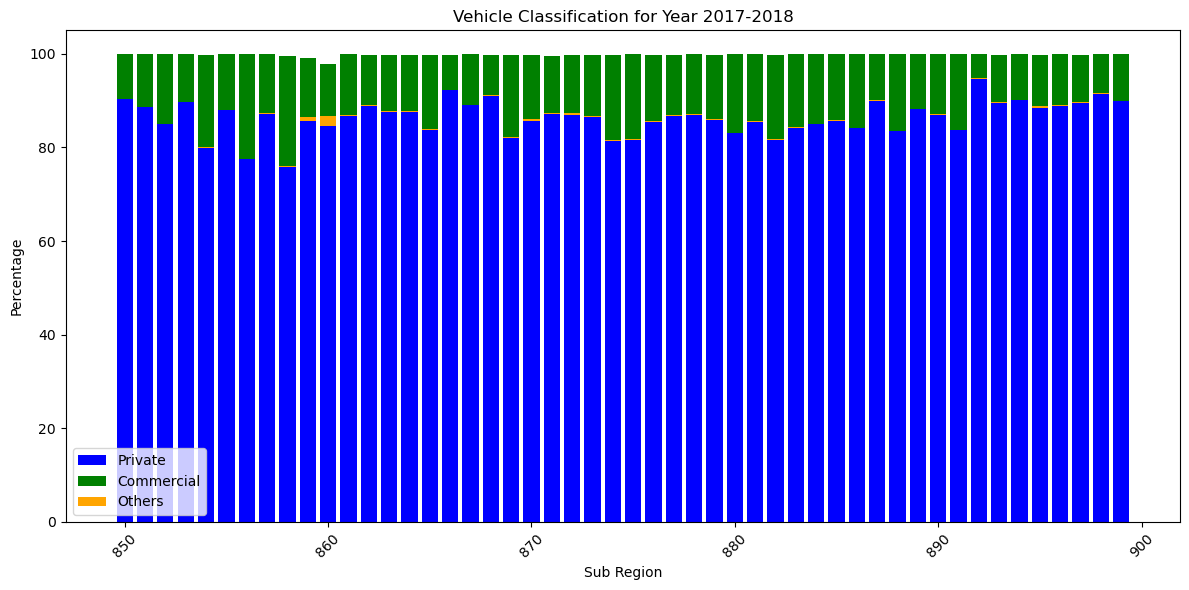

In [101]:
def plot_vehicle_classification(year):
    # a datframe containing all the rows of year column and taking columns from Motor Cycles
    filtered_df = df2[df2['Year'] == year]
    vehicle_categories = filtered_df.columns[5:]
    
    # selecting private vehicles and commercial vehicles
    private_vehicles = ['Motor Cycles', 'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons', 'Private Service Vehicles']
    commercial_vehicles = ['Taxis meter fited', 'Luxury /Turist Cabs/', 'Auto-rikshaws', 'Stage carriages', 'Contract carriages /Mini Bus', 'School Buses', 'Ambulances', 'Articulated/Multi.', 'Trucks & Lorries', 'Tanker', 'Delivery Van (4 wheelers)', 'Delivery Van (3 wheelers)', 'Tractors', 'Trailors']

    # calculating the total counts of different vehicles
    private_total = filtered_df[private_vehicles].sum(axis=1)
    commercial_total = filtered_df[commercial_vehicles].sum(axis=1)
    others_total = filtered_df['Others']

    # calculating the percentage of each vehicle category
    totals = pd.DataFrame({'Private': private_total, 'Commercial': commercial_total, 'Others': others_total})
    totals_percentage = totals.div(totals.sum(axis=1), axis=0) * 100

    # bar plot for diffrent type of vehicles
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ['blue', 'green', 'orange']

    for i, category in enumerate(totals_percentage.columns):
        if category == 'Private':
            ax.bar(totals_percentage.index, totals_percentage[category], bottom=totals_percentage.iloc[:, :i].sum(axis=1), label=category, color=colors[i])
        else:
            ax.bar(totals_percentage.index, totals_percentage[category], bottom=totals_percentage['Private'], label=category, color=colors[i])

    ax.set_xlabel('Sub Region')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Vehicle Classification for Year {year}')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
plot_vehicle_classification('2017-2018')


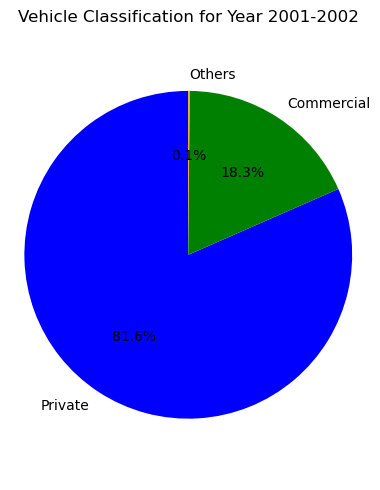

In [98]:
def plot_vehicle_classification(year):
    filtered_df = df2[df2['Year'] == year]
    vehicle_categories = filtered_df.columns[3:]

    private_vehicles = ['Motor Cycles', 'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons', 'Private Service Vehicles']
    commercial_vehicles = ['Taxis meter fited', 'Luxury /Turist Cabs/', 'Auto-rikshaws', 'Stage carriages', 'Contract carriages /Mini Bus', 'School Buses', 'Ambulances', 'Articulated/Multi.', 'Trucks & Lorries', 'Tanker', 'Delivery Van (4 wheelers)', 'Delivery Van (3 wheelers)', 'Tractors', 'Trailors']

    private_total = filtered_df[private_vehicles].sum(axis=1).sum()
    commercial_total = filtered_df[commercial_vehicles].sum(axis=1).sum()
    others_total = filtered_df['Others'].sum()

    labels = ['Private', 'Commercial', 'Others']
    sizes = [private_total, commercial_total, others_total]
    colors = ['blue', 'green', 'orange']

    # creating a pie chart for showing percentages of each vechicle type 
    fig, ax = plt.subplots(figsize=(4, 5)) 
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Vehicle Classification for Year {year}')

    plt.tight_layout()
    plt.show()

# Example usage
plot_vehicle_classification('2001-2002')
